# Colab Setup

This starter notebook verifies that your Colab environment can install packages, access a dataset from **persistent storage**, load the data, make a plot, and compute a few statistics.


## Install required packages
- Colab runtimes are ephemeral. Packages may need to be installed each session.


In [5]:
print('Installing required packages (pandas, matplotlib)...')
!pip -q install pandas matplotlib
print('Installation complete.')


Installing required packages (pandas, matplotlib)...
Installation complete.


## Load a data file from persistent storage
- Your dataset access must be **persistent** (Google Drive, public GitHub, or another stable location). Do not rely on manual uploads each time.

### Choose ONE data access method below

**Option A: Google Drive**
- Put the CSV in your Google Drive (recommended folder: `MyDrive/ml-toy-data/`).
- This notebook will mount Drive and read from a file path.

**Option B: Public GitHub repository**
- Commit the CSV to a public GitHub repo (recommended folder: `data/`).
- This notebook will read from the repo's **raw** file URL.

Your goal is that a runtime restart does **not** require you to manually upload the dataset again.


In [6]:
import pandas as pd

# Choose: 'drive' or 'github'
DATA_SOURCE = 'github'

if DATA_SOURCE == 'drive':
    from google.colab import drive
    drive.mount('/content/drive')
    # Update this path to where you stored the CSV in your Drive
    csv_path = '/content/drive/MyDrive/ml-toy-data/Rice_Cammeo_Osmancik.csv'
    print(f'Reading CSV from Drive: {csv_path}')
    df = pd.read_csv(csv_path)
elif DATA_SOURCE == 'github':
    # Update this raw URL to point to YOUR public GitHub repo CSV
    raw_url = 'https://raw.githubusercontent.com/stephen010x/ut_collab_data/refs/heads/main/assignment-01/2026-20-aaa-220-Rice_Cammeo_Osmancik.csv'
    print(f'Reading CSV from GitHub raw URL: {raw_url}')
    df = pd.read_csv(raw_url)
else:
    raise ValueError("DATA_SOURCE must be 'drive' or 'github'")

print(f'Successfully loaded {len(df)} rows and {len(df.columns)} columns')
print('First 5 rows:')
df.head()


Reading CSV from GitHub raw URL: https://raw.githubusercontent.com/stephen010x/ut_collab_data/refs/heads/main/assignment-01/2026-20-aaa-220-Rice_Cammeo_Osmancik.csv
Successfully loaded 3810 rows and 8 columns
First 5 rows:


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


## Plot data

Create a scatter plot similar to the local starter script.


### Plot requirement
- Generate a plot image
- Save it to the notebook runtime (so you can download it) Look in the file explorer for this session to find the downloadable file.


Creating scatter plot: Major_Axis_Length vs Minor_Axis_Length...


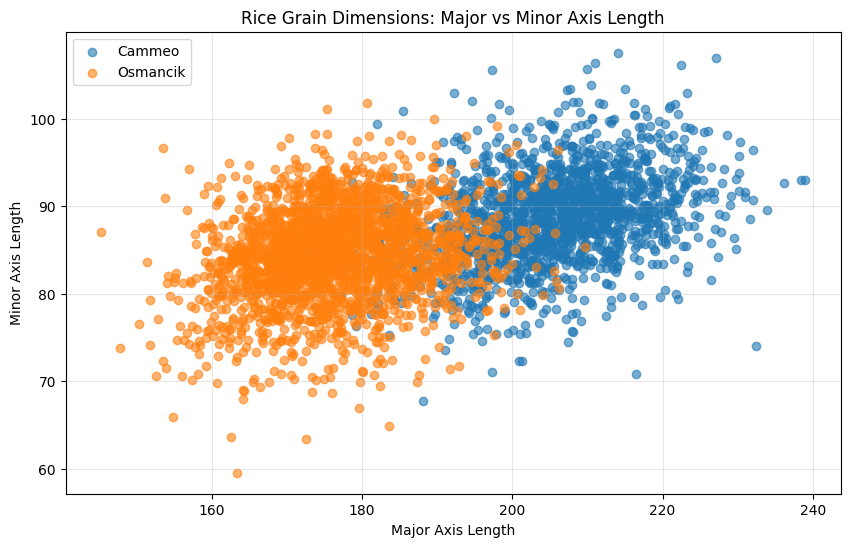

Scatter plot saved as rice_scatter_plot.png


In [7]:
import matplotlib.pyplot as plt

print('Creating scatter plot: Major_Axis_Length vs Minor_Axis_Length...')
plt.figure(figsize=(10, 6))

for class_name in df['Class'].unique():
    class_data = df[df['Class'] == class_name]
    plt.scatter(
        class_data['Major_Axis_Length'],
        class_data['Minor_Axis_Length'],
        label=class_name,
        alpha=0.6,
    )

plt.xlabel('Major Axis Length')
plt.ylabel('Minor Axis Length')
plt.title('Rice Grain Dimensions: Major vs Minor Axis Length')
plt.legend()
plt.grid(True, alpha=0.3)

output_file = 'rice_scatter_plot.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()
print(f'Scatter plot saved as {output_file}')


## Aggregate statistics

Compute and display the **mean** and **standard deviation** of the `Perimeter` feature for the `Cammeo` class.


### Note
This matches the aggregate check performed in the local starter script.


In [8]:
cammeo_data = df[df['Class'] == 'Cammeo']
perimeter_mean = cammeo_data['Perimeter'].mean()
perimeter_std = cammeo_data['Perimeter'].std()

print('Aggregate Statistics (Class: Cammeo)')
print(f'  Perimeter Mean: {perimeter_mean:.2f}')
print(f'  Perimeter Std Dev: {perimeter_std:.2f}')
print(f'  Sample Count: {len(cammeo_data)}')


Aggregate Statistics (Class: Cammeo)
  Perimeter Mean: 487.44
  Perimeter Std Dev: 22.18
  Sample Count: 1630


## Summary

- You installed required Python packages in Colab.
- You loaded the rice dataset from **persistent storage** (Drive or GitHub).
- You generated and saved a plot image.
- You computed basic aggregate statistics.

If any step failed, capture the error message and document what you tried.
